<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_2_4_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_2.4_n20.csv',
 'data_add_delta_2.4_n30.csv',
 'data_add_delta_2.4_n60.csv',
 'data_add_delta_2.4_n120.csv',
 'data_add_delta_2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,20.358430,68.453944,73.160773,-14103.006027,-13931.032880,9670.852277,-23601.885157
1,0.0,1.0,45.452839,82.990009,91.735847,7854.798291,8084.976985,2340.976656,5744.000329
2,0.0,2.0,32.023298,48.376515,31.510017,-4776.707365,-4654.797535,16585.333636,-21240.131171
3,0.0,3.0,51.600048,41.602642,58.356852,175.688844,337.248385,-12872.321828,13209.570213
4,0.0,4.0,81.855786,87.692149,56.676940,-52985.172306,-52748.947431,18770.041122,-71518.988553
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,47.616670,57.168335,68.202796,-178.404096,4.583706,3991.476553,-3986.892847
19996,999.0,16.0,99.088411,42.450997,29.093799,-4767.238644,-4586.605437,-20803.900161,16217.294724
19997,999.0,17.0,81.430306,99.838554,58.054514,-57267.812640,-57018.489266,-32566.911916,-24451.577350
19998,999.0,18.0,86.129443,59.116680,42.138299,3651.478182,3848.862604,-19941.646056,23790.508660


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,20.358430,68.453944,73.160773,-14103.006027,-13931.032880,9670.852277,-23601.885157
1,0.0,1.0,45.452839,82.990009,91.735847,7854.798291,8084.976985,2340.976656,5744.000329
2,0.0,2.0,32.023298,48.376515,31.510017,-4776.707365,-4654.797535,16585.333636,-21240.131171
3,0.0,3.0,51.600048,41.602642,58.356852,175.688844,337.248385,-12872.321828,13209.570213
4,0.0,4.0,81.855786,87.692149,56.676940,-52985.172306,-52748.947431,18770.041122,-71518.988553
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,47.616670,57.168335,68.202796,-178.404096,4.583706,3991.476553,-3986.892847
19996,999.0,16.0,99.088411,42.450997,29.093799,-4767.238644,-4586.605437,-20803.900161,16217.294724
19997,999.0,17.0,81.430306,99.838554,58.054514,-57267.812640,-57018.489266,-32566.911916,-24451.577350
19998,999.0,18.0,86.129443,59.116680,42.138299,3651.478182,3848.862604,-19941.646056,23790.508660


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    20.358430  68.453944  ...   9670.852277 -23601.885157
      1.0    45.452839  82.990009  ...   2340.976656   5744.000329
      2.0    32.023298  48.376515  ...  16585.333636 -21240.131171
      3.0    51.600048  41.602642  ... -12872.321828  13209.570213
      4.0    81.855786  87.692149  ...  18770.041122 -71518.988553
...                ...        ...  ...           ...           ...
999.0 15.0   47.616670  57.168335  ...   3991.476553  -3986.892847
      16.0   99.088411  42.450997  ... -20803.900161  16217.294724
      17.0   81.430306  99.838554  ... -32566.911916 -24451.577350
      18.0   86.129443  59.116680  ... -19941.646056  23790.508660
      19.0   29.430035  98.504411  ... -40841.081500 -58467.155233

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    20.358430  68.453944  ...   9670.852277 -23601.885157
      1.0    45.452839  82.990009  ...   2340.976656   5744.000329
      2.0    32.023298  48.376515  ...  16585.333636 -21240.131171
      3.0    51.600048  41.602642  ... -12872.321828  13209.570213
      4.0    81.855786  87.692149  ...  18770.041122 -71518.988553
...                ...        ...  ...           ...           ...
999.0 15.0   47.616670  57.168335  ...   3991.476553  -3986.892847
      16.0   99.088411  42.450997  ... -20803.900161  16217.294724
      17.0   81.430306  99.838554  ... -32566.911916 -24451.577350
      18.0   86.129443  59.116680  ... -19941.646056  23790.508660
      19.0   29.430035  98.504411  ... -40841.081500 -58467.155233

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,20.358430,68.453944,73.160773,-14103.006027,-13931.032880,9670.852277,-23601.885157
1,0.0,1.0,45.452839,82.990009,91.735847,7854.798291,8084.976985,2340.976656,5744.000329
2,0.0,2.0,32.023298,48.376515,31.510017,-4776.707365,-4654.797535,16585.333636,-21240.131171
3,0.0,3.0,51.600048,41.602642,58.356852,175.688844,337.248385,-12872.321828,13209.570213
4,0.0,4.0,81.855786,87.692149,56.676940,-52985.172306,-52748.947431,18770.041122,-71518.988553
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,47.616670,57.168335,68.202796,-178.404096,4.583706,3991.476553,-3986.892847
19996,999.0,16.0,99.088411,42.450997,29.093799,-4767.238644,-4586.605437,-20803.900161,16217.294724
19997,999.0,17.0,81.430306,99.838554,58.054514,-57267.812640,-57018.489266,-32566.911916,-24451.577350
19998,999.0,18.0,86.129443,59.116680,42.138299,3651.478182,3848.862604,-19941.646056,23790.508660


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    20.358430  68.453944  ...   9670.852277 -23601.885157
      1.0    45.452839  82.990009  ...   2340.976656   5744.000329
      2.0    32.023298  48.376515  ...  16585.333636 -21240.131171
      3.0    51.600048  41.602642  ... -12872.321828  13209.570213
      4.0    81.855786  87.692149  ...  18770.041122 -71518.988553
...                ...        ...  ...           ...           ...
999.0 15.0   47.616670  57.168335  ...   3991.476553  -3986.892847
      16.0   99.088411  42.450997  ... -20803.900161  16217.294724
      17.0   81.430306  99.838554  ... -32566.911916 -24451.577350
      18.0   86.129443  59.116680  ... -19941.646056  23790.508660
      19.0   29.430035  98.504411  ... -40841.081500 -58467.155233

[20000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

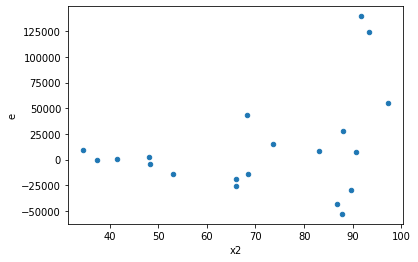

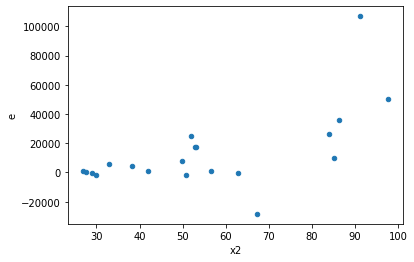

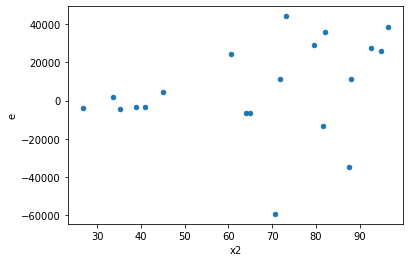

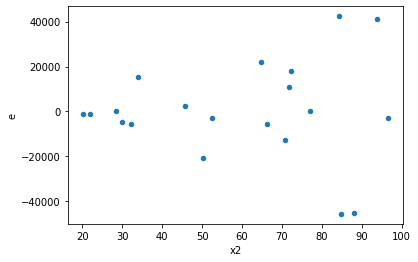

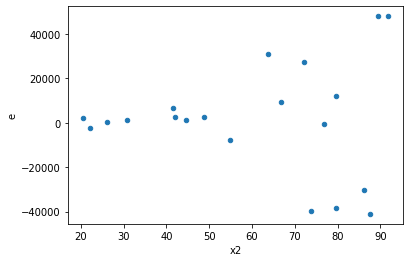

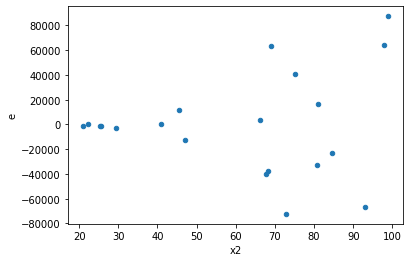

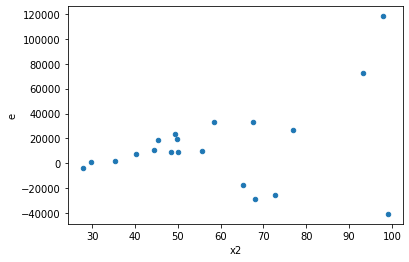

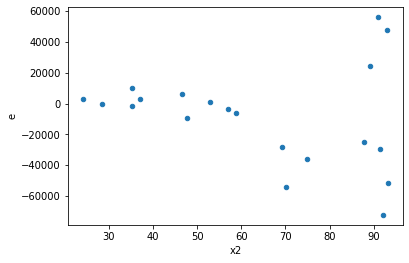

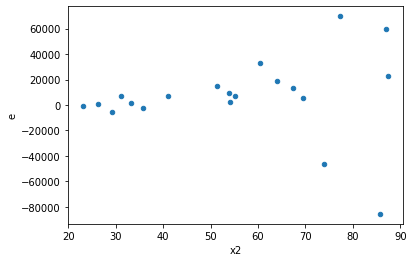

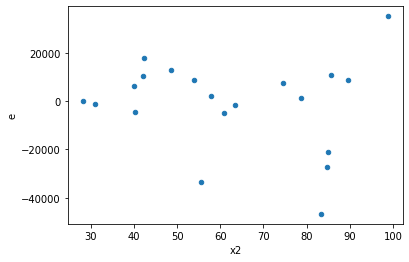

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,5.0,5.0,16001635995.098644,80329693.25458117,4000408998.774661,20082423.313645292,199.19951573058046,1.9056495783154048e-05,0.9999904717521084,Reject001=0 : Heteroscedasticity
1.0,5.0,5.0,3486871282.1578965,19913199.137579463,871717820.5394741,4978299.784394866,175.10352093941552,2.6239847956466278e-05,0.9999868800760218,Reject001=0 : Heteroscedasticity
2.0,5.0,5.0,2643897765.3741493,99958040.81373022,660974441.3435373,24989510.203432556,26.450075890352824,0.0026454800480164575,0.9986772599759918,Reject001=0 : Heteroscedasticity
3.0,5.0,5.0,4256273211.89608,195408244.12043378,1064068302.97402,48852061.030108444,21.78144136678726,0.004181563765710328,0.9979092181171448,Reject001=0 : Heteroscedasticity
4.0,5.0,5.0,7304418424.04781,9331840.876805764,1826104606.0119524,2332960.219201441,782.7414248139293,6.309614921651274e-07,0.9999996845192539,Reject001=0 : Heteroscedasticity
5.0,5.0,5.0,16524317472.67588,132447959.68065749,4131079368.16897,33111989.920164373,124.76083068789671,6.073726855326811e-05,0.9999696313657234,Reject001=0 : Heteroscedasticity
6.0,5.0,5.0,16925889855.68883,113057518.6162529,4231472463.9222074,28264379.654063225,149.7104311402745,3.8687980179030745e-05,0.9999806560099105,Reject001=0 : Heteroscedasticity
7.0,5.0,5.0,12142895474.328041,116886702.89348221,3035723868.5820103,29221675.723370552,103.88602958023165,9.545173539371454e-05,0.9999522741323031,Reject001=0 : Heteroscedasticity
8.0,5.0,5.0,11540534353.105337,63951240.760365486,2885133588.2763343,15987810.190091372,180.458333816374,2.4351032900993275e-05,0.9999878244835495,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,16001635995.098644,80329693.25458117,4000408998.774661,20082423.313645292,199.19951573058046,1.9056495783154048e-05,Reject001=0 : Heteroscedasticity
1.0,5.0,5.0,3486871282.1578965,19913199.137579463,871717820.5394741,4978299.784394866,175.10352093941552,2.6239847956466278e-05,Reject001=0 : Heteroscedasticity
2.0,5.0,5.0,2643897765.3741493,99958040.81373022,660974441.3435373,24989510.203432556,26.450075890352824,0.0026454800480164575,Reject001=0 : Heteroscedasticity
3.0,5.0,5.0,4256273211.89608,195408244.12043378,1064068302.97402,48852061.030108444,21.78144136678726,0.004181563765710328,Reject001=0 : Heteroscedasticity
4.0,5.0,5.0,7304418424.04781,9331840.876805764,1826104606.0119524,2332960.219201441,782.7414248139293,6.309614921651274e-07,Reject001=0 : Heteroscedasticity
5.0,5.0,5.0,16524317472.67588,132447959.68065749,4131079368.16897,33111989.920164373,124.76083068789671,6.073726855326811e-05,Reject001=0 : Heteroscedasticity
6.0,5.0,5.0,16925889855.68883,113057518.6162529,4231472463.9222074,28264379.654063225,149.7104311402745,3.8687980179030745e-05,Reject001=0 : Heteroscedasticity
7.0,5.0,5.0,12142895474.328041,116886702.89348221,3035723868.5820103,29221675.723370552,103.88602958023165,9.545173539371454e-05,Reject001=0 : Heteroscedasticity
8.0,5.0,5.0,11540534353.105337,63951240.760365486,2885133588.2763343,15987810.190091372,180.458333816374,2.4351032900993275e-05,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    766
Reject001=1 : Homoscedasticity      234
Name: Result_test, dtype: int64